In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [1]:
def trend(time, slope):
  return time * slope

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.3,
                    np.cos((season_time + 0.5) * np.pi) * 2.5,
                    (season_time**20) * 2)

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

num_years = 4

time = np.arange(num_years * 365 + 1)
baseline = 30
slope = 0.04
amplitude = 20
period = 365

series = baseline + trend(time, slope) + seasonality(time, period, amplitude)
noise_level = 7
series += white_noise(time, noise_level, 42)

plt.figure(figsize=(15,7))
plot_series(time, series)
for year in range(num_years+1):
  plt.vlines(365 * year, 0, 150, linestyles='dashed')

NameError: ignored

In [ ]:
split_time = 365*3
split_time

time_train = time[:split_time]
x_train = series[:split_time]

time_val = time[split_time:]
x_val = series[split_time:]

# Naive Forecast

In [ ]:
naive_forecast = series[split_time - 1: -1]

Mean Squared Error: 120.10


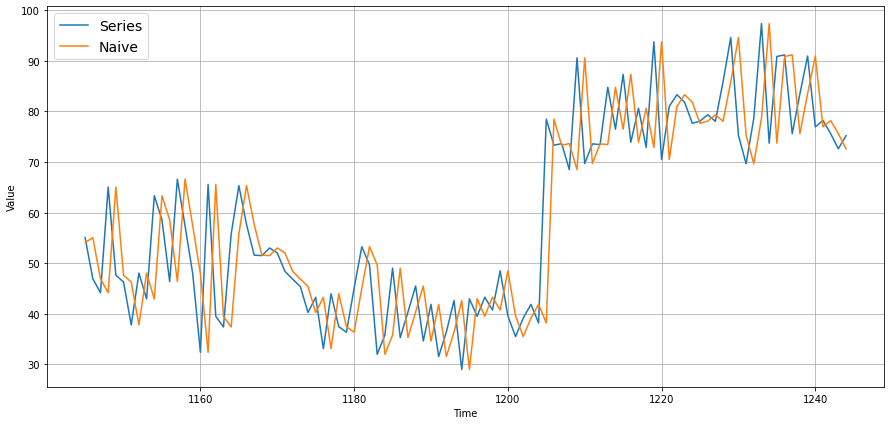

In [ ]:
plt.figure(figsize=(15,7))
plot_series(time_val, x_val, start=50, end=150,  label="Series")
plot_series(time_val, naive_forecast, start=50, end=150, label="Naive")

mse = tf.keras.metrics.mse(x_val, naive_forecast).numpy()
print("Mean Squared Error:", f"{mse:.2f}")

#Moving Average Forecast

In [ ]:
def moving_average_forecast(series, window_size=2):
  result = series.cumsum()
  result[window_size:] = result[window_size:] - result[:-window_size]
  return result[window_size - 1:-1] / window_size


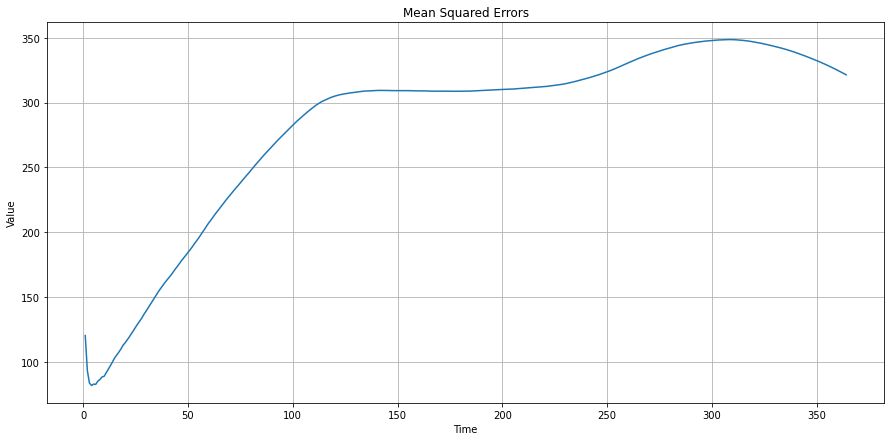

Minimum MSE: 81.52879473597756
Window size with least MSE 4


81.52879473597756

In [ ]:
mse_results = dict()
window_sizes = range(1, 365)
for window_size in window_sizes:
  ma_forecast = moving_average_forecast(series, window_size)[split_time - window_size:]
  mse = tf.keras.metrics.mse(x_val, ma_forecast).numpy()
  mse_results[window_size] = mse

plt.figure(figsize=(15,7))
plot_series(window_sizes, list(mse_results.values()))
plt.title("Mean Squared Errors")
plt.show()

print("Minimum MSE:", np.min(list(mse_results.values())))
best_window_size = np.argmin(list(mse_results.values())) + 1
print("Window size with least MSE", best_window_size)
mse_results[best_window_size]

Mean Squared Error: 81.53


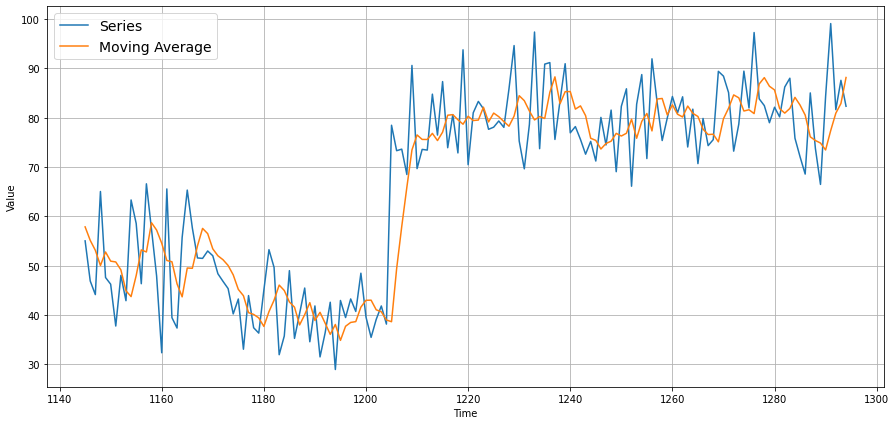

In [ ]:
window_size = best_window_size
ma_forecast = moving_average_forecast(series, window_size)[split_time - window_size:]

plt.figure(figsize=(15,7))
plot_series(time_val, x_val, start=50, end=200, label="Series")
plot_series(time_val, ma_forecast, start=50, end=200, label="Moving Average")

mse = tf.keras.metrics.mse(x_val, ma_forecast).numpy()
print("Mean Squared Error:", f"{mse:.2f}")

When series is too noisy, MSE with bigger windows are more accurate; otherwise, naive forecast is a good baseline.

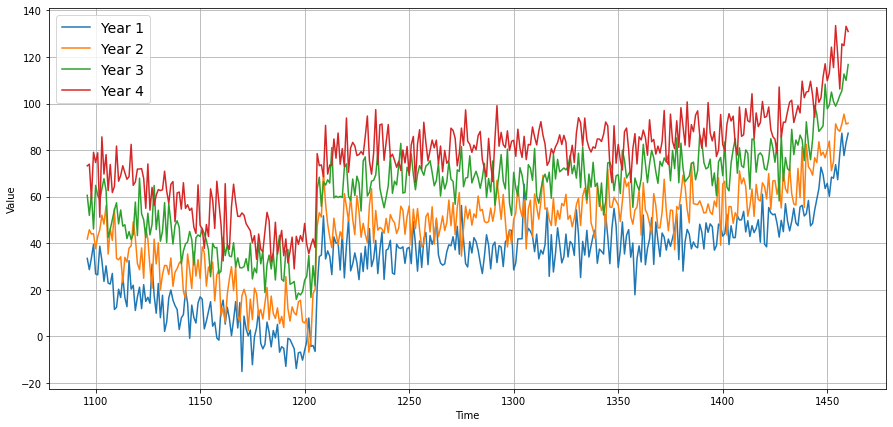

In [ ]:
plt.figure(figsize=(15, 7))

for i in range(num_years):
  plot_series(time_val[1:], series[i*365: (i+1)*365], label=f"Year {i+1}")

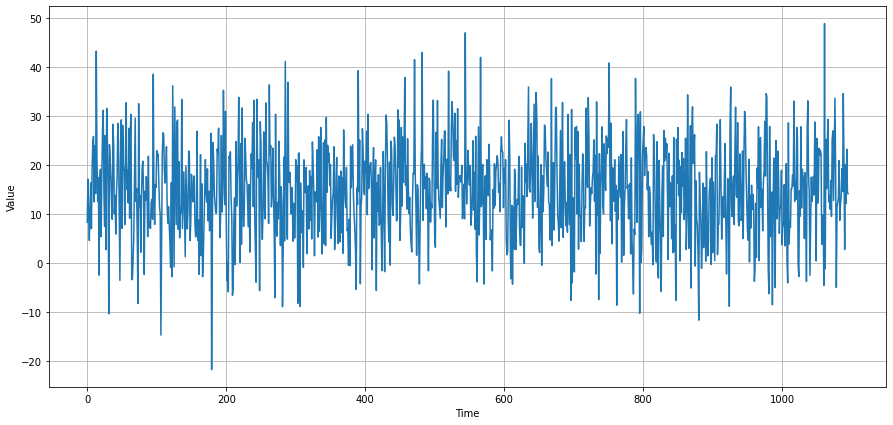

In [ ]:
diff_series = series[365:] - series[:-365]
diff_time = time[:-365]

plt.figure(figsize=(15, 7))
plot_series(diff_time, diff_series)

In [ ]:
diff_window_size = 10
moving_average_forecast(diff_series, diff_window_size)

array([14.43593748, 14.8517408 , 15.53472633, ..., 15.81175183,
       17.26514208, 17.47598568])